# Chapter 1 Environmental Engineering: Air Quality Modeling

1. [Introduction: Gaussian Plume model](#1.-Introduction)
2. [Simulation_ GPM](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)
4. [Simulation: Compute Concentration](#4.-Simulation)
5. [Self-Assessment](#3.-Self-Assessment) 

## 1. Introduction

### Gaussian Plume Dispersion Model – Interactive Visualization

The Gaussian Plume Model is a widely used mathematical model that describes how air pollutants disperse from a point source, such as a smokestack, under steady-state conditions. It assumes that the concentration of a pollutant in the atmosphere follows a normal (Gaussian) distribution in the crosswind and vertical directions, resulting in a “plume” of pollution downwind of the source.

---
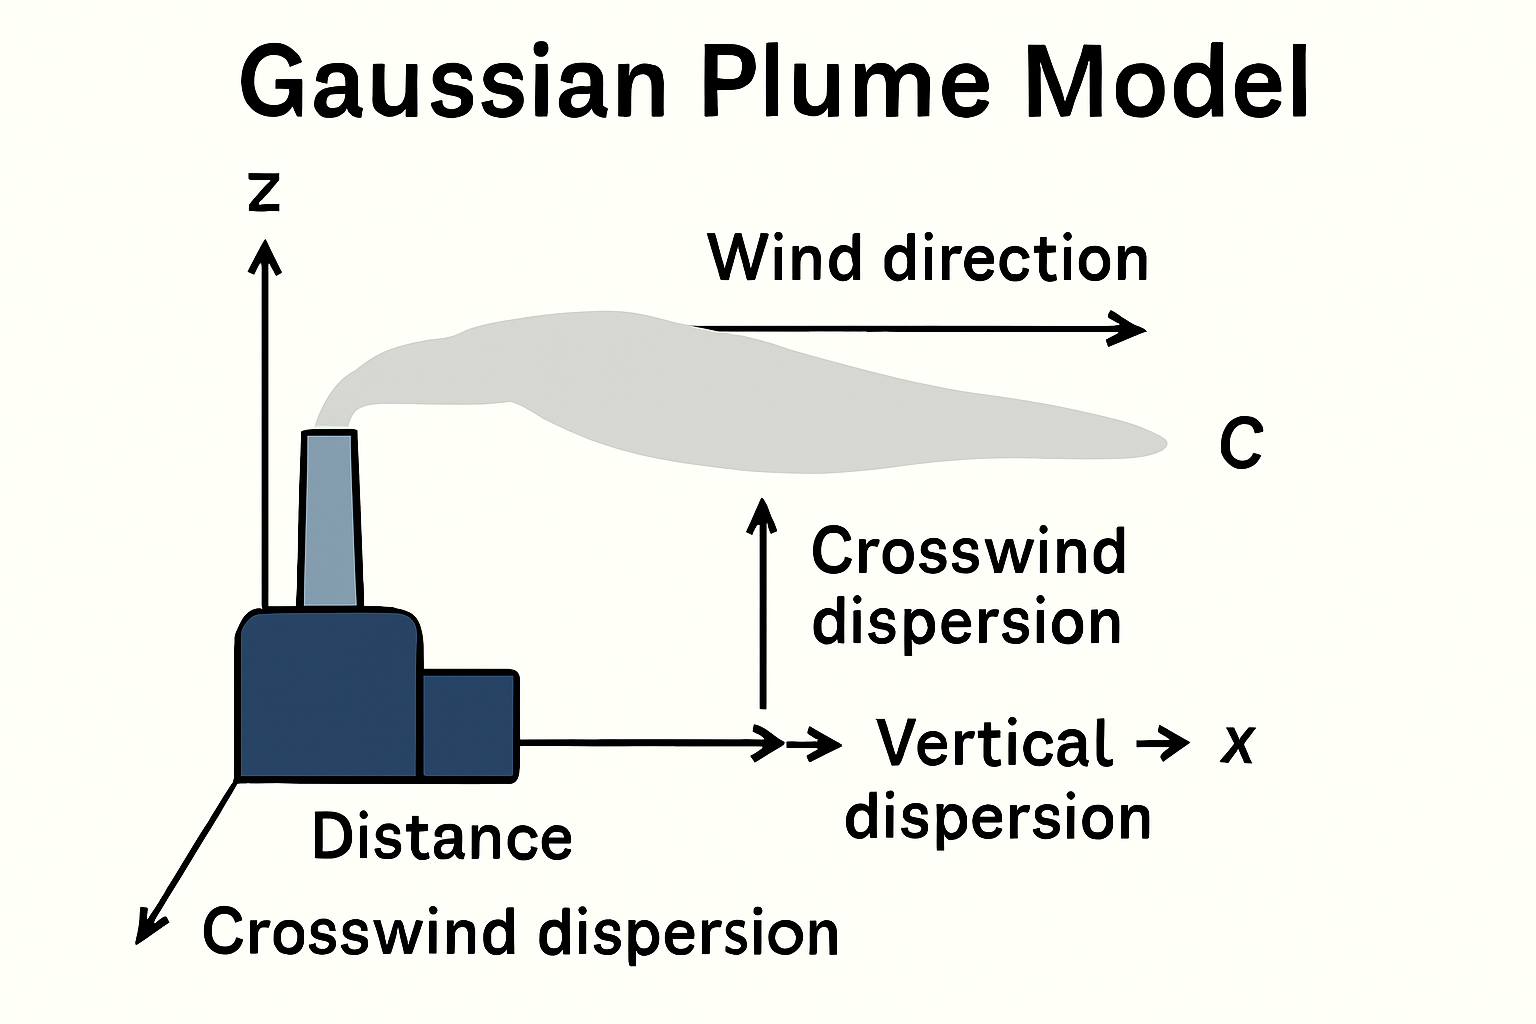

The general equation for pollutant concentration \( C(x, y, z) \) at location \( (x, y, z) \) is:

$$
C(x, y, z) = \frac{Q}{2\pi \sigma_y \sigma_z u}
\cdot \exp\left( -\frac{y^2}{2\sigma_y^2} \right)
\cdot \left[
\exp\left( -\frac{(z - H)^2}{2\sigma_z^2} \right)
+ \exp\left( -\frac{(z + H)^2}{2\sigma_z^2} \right)
\right]
$$

**Where:**
- $( C $): concentration [µg/m³]
- $( Q $): emission rate [g/s]
- $( u $): wind speed at stack height [m/s]
- $( H $): effective stack height [m]  
- $( \sigma_y, \sigma_z $): lateral and vertical dispersion coefficients [m]
- $( x $): downwind distance [m]  
- $( y $): crosswind offset [m]  
- $( z $): height above ground [m]



### ✅ Ground Reflection
- The plume reflects off the ground due to the **no-flux boundary condition**.
- This is modeled by the **image source** at \( -H \), contributing the second exponential term in the equation.

### ✅ Thermal Inversion Reflection
- A **thermal inversion layer** acts like a lid, trapping pollutants below.
- Reflection from this layer can be modeled by adding additional **image sources** above the inversion height.

---

### 🧠 Conceptual Insight

- Reflections **increase concentration** near the ground.
- Inversion layers **suppress vertical mixing**, leading to **higher ground-level concentrations**.
- The Gaussian model assumes **steady-state**, **constant wind**, and **uniform terrain**.

---

### ❓ Quiz Questions

1. What causes the plume to reflect off the ground?
2. How does a thermal inversion layer affect pollutant dispersion?
3. Why is the second exponential term in the Gaussian equation important?
4. What assumptions does the Gaussian plume model make?
5. How would you modify the model for complex terrain or variable wind?

  
---
###  Estimating Dispersion Coefficients

The coefficients \( \sigma_y \) and \( \sigma_z \) vary with distance and atmospheric stability. The following empirical formulas are adapted from Pasquill-Gifford curves.

### Dispersion Coefficient Formulas

$$
\sigma_y(x) = a \cdot x \cdot \left(1 + b \cdot x\right)^{-0.5} \\
\sigma_z(x) = c \cdot x \cdot \left(1 + d \cdot x\right)^{-0.5}
$$

| Stability Class | Description         | \( a \)  | \( b \)   | \( c \)  | \( d \)   |
|------------------|----------------------|---------|----------|---------|----------|
| A                | Very unstable        | 0.22    | 0.0001   | 0.20    | 0.0001   |
| B                | Moderately unstable  | 0.16    | 0.0001   | 0.12    | 0.0001   |
| C                | Slightly unstable    | 0.11    | 0.0001   | 0.08    | 0.0001   |
| D                | Neutral              | 0.08    | 0.0001   | 0.06    | 0.0001   |
| E                | Slightly stable      | 0.06    | 0.0001   | 0.03    | 0.0001   |
| F                | Very stable          | 0.04    | 0.0001   | 0.016   | 0.0001   |

---

### Effective Stack Height

The effective stack height \( H \) is given by:

$$
H = h + \Delta h
$$

**Where:**
- \( h \): physical stack height [m]  
- \( \Delta h \): plume rise [m] (due to buoyancy and/or momentum)

###  Approximate Buoyant Plume Rise (Stable Conditions)

$$
\Delta h = 1.6 \left( \frac{F^{1/3}}{u} \right)
\quad \text{with} \quad
F = \frac{g \cdot V \cdot \Delta T}{T_a}
$$

**Where:**
- $( F $): buoyancy flux [m⁴/s³]  
- $( g $): gravitational acceleration ≈ 9.81 m/s²  
- $( V $): stack gas exit volume flow rate [m³/s]  
- $( \Delta T $): stack–ambient temperature difference [K]  
- $( T_a $): ambient temperature [K]  
- $( u $): wind speed [m/s]
---
###  Notes
- Use **stability classes (A–F)** based on surface conditions, solar radiation, and wind speed
- The **ground reflection term** accounts for pollutant dispersion near the surface
- The model assumes **steady-state conditions** (constant wind and emissions)

This notebook provides an **interactive visualization** of the ground-level concentration of pollutants based on:

- 📍 Source emission rate (Q)
- 🌬️ Wind speed (u)
- 📏 Effective stack height (H)
- 🌡️ Atmospheric stability class (A–F)

###  Key Features

- Simulate how different environmental and source parameters affect pollutant dispersion
- Visualize the concentration distribution at ground level as a 2D contour plot
- Explore six atmospheric stability classes (A = very unstable, F = very stable)
- Adjustable inputs with interactive sliders for real-time exploration

### Applications

- Air quality impact assessments for industrial stacks
- Regulatory modeling and compliance
- Environmental engineering education and plume behavior analysis


## 2. Simulation

### 🌬️ Gaussian Plume Air Quality Model – Summary in Markdown

This Python-based model simulates **pollutant dispersion** from a point source (e.g., smokestack) using the **Gaussian plume equation**. It visualizes how **wind speed**, **atmospheric stability**, **stack height**, and **inversion layer** influence concentration at various downwind distances and heights.

---

### 🔧 Model Components

| Component                   | Description                                                |
|----------------------------|------------------------------------------------------------|
| `sigma_y(x)`, `sigma_z(x)` | Horizontal & vertical dispersion using empirical formulas   |
| `gaussian_plume()`         | Calculates pollutant concentration with reflections        |
| `rotate_coords()`          | Rotates coordinates to align plume with wind direction     |
| `plot_plotly()`            | Interactive 2D heatmap showing concentration distribution  |
| `interact()`               | Sliders and dropdowns to adjust model inputs               |

---

### 💡 Inputs and Controls

| Parameter      | Description                       |
|----------------|-----------------------------------|
| `Q`            | Emission rate (µg/s)              |
| `u`            | Wind speed (m/s)                  |
| `H`            | Stack height (m)                  |
| `stability`    | Atmospheric stability class (A–F) |
| `z_inv`        | Inversion layer height (m)        |
| `wind_dir`     | Wind direction (degrees)          |

---

### 📈 What It Shows

- Heatmap of **pollutant concentration** vs. distance and height
- **Plume widening or narrowing** with stability class
- **Inversion effects** when vertical mixing is restricted
- **Wind direction** adjusts plume orientation

---

### 🧠 How to Interpret Results

| Feature             | Meaning                                                      |
|---------------------|--------------------------------------------------------------|
| Bright plume core   | High concentration near the stack and ground level           |
| Wider dispersion    | Occurs in unstable (A–C) conditions with higher turbulence   |
| Inversion line      | Limits vertical mixing; pollutants may pool below it         |
| Wind rotation       | Plume shifts with prevailing wind direction                  |

---

### 🧪 Equation Used (Simplified)

$$
C(x,z) = \frac{Q}{2\pi u \sigma_y \sigma_z} \left[ e^{-\frac{(z - H)^2}{2 \sigma_z^2}} + e^{-\frac{(z + H)^2}{2 \sigma_z^2}} \right]
$$

Optional terms account for **reflection from the inversion layer**.

---

> This model offers a practical and interactive way to explore how atmospheric conditions affect pollution dispersion — valuable for air quality engineers, planners, and educators.


In [6]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider, Dropdown

# --- Dispersion functions ---
def sigma_y(x, stability='D'):
    a = {'A': 0.22, 'B': 0.16, 'C': 0.11, 'D': 0.08, 'E': 0.06, 'F': 0.04}
    b = {k: 0.0001 for k in a}
    return a[stability] * x * (1 + b[stability] * x) ** -0.5

def sigma_z(x, stability='D'):
    a = {'A': 0.20, 'B': 0.12, 'C': 0.08, 'D': 0.06, 'E': 0.03, 'F': 0.016}
    b = {k: 0.0001 for k in a}
    return a[stability] * x * (1 + b[stability] * x) ** -0.5

# --- Gaussian plume with reflection ---
def gaussian_plume(x, z, Q, u, H, stability, z_inv=None):
    sy = sigma_y(x, stability)
    sz = sigma_z(x, stability)
    term1 = Q / (2 * np.pi * u * sy * sz)
    base = np.exp(- (z - H)**2 / (2 * sz**2)) + np.exp(- (z + H)**2 / (2 * sz**2))
    if z_inv and z_inv > 0:
        base += np.exp(- (2*z_inv - z - H)**2 / (2 * sz**2))
        base += np.exp(- (2*z_inv + z - H)**2 / (2 * sz**2))
    return term1 * base

# --- Coordinate rotation for wind direction ---
def rotate_coords(x, y, angle_deg):
    theta = np.radians(angle_deg)
    x_rot = x * np.cos(theta) + y * np.sin(theta)
    return x_rot

# --- Plotting function with wind direction ---
def plot_plotly(Q, u, H, stability, z_inv, wind_dir):
    x_vals = np.linspace(-500, 2500, 150)
    z_vals = np.linspace(0, 300, 100)
    x_grid, z_grid = np.meshgrid(x_vals, z_vals)

    # Rotate x according to wind direction (assume y = 0 slice)
    x_rot = rotate_coords(x_grid, np.zeros_like(x_grid), -wind_dir)
    x_rot = np.maximum(x_rot, 1.0)  # prevent division by zero

    C = gaussian_plume(x_rot, z_grid, Q, u, H, stability, z_inv)

    fig = go.Figure(data=go.Heatmap(
        x=x_vals,
        y=z_vals,
        z=C,
        colorscale='Viridis',
        zmin=0,
        zmax=0.12,  # Adjust this upper limit as needed
        colorbar=dict(title='Concentration (µg/m³)'),
        hovertemplate='x: %{x:.0f} m<br>z: %{y:.0f} m<br>Conc: %{z:.2f} µg/m³<extra></extra>'
    ))

    fig.update_layout(
        title=f"Gaussian Plume with Wind Direction {wind_dir}°<br>Stability: {stability} | Inversion: {z_inv or '∞'} m",
        xaxis_title='Projected Downwind Distance (m)',
        yaxis_title='Height z (m)',
        height=500
    )

    if z_inv and z_inv > 0:
        fig.add_shape(type="line", x0=x_vals[0], x1=x_vals[-1], y0=z_inv, y1=z_inv,
                      line=dict(color="red", dash="dash"), name="Inversion")

    fig.show()

# --- Widgets with wind direction added ---
interact(
    plot_plotly,
    Q=FloatSlider(value=100, min=10, max=5000, step=10, description="Emission Q"),
    u=FloatSlider(value=5.0, min=0.5, max=50.0, step=0.5, description="Wind Speed"),
    H=FloatSlider(value=50, min=0, max=150, step=5, description="Stack Height"),
    stability=Dropdown(options=['A', 'B', 'C', 'D', 'E', 'F'], value='D', description="Stability"),
    z_inv=FloatSlider(value=0, min=0, max=300, step=10, description="Inversion Height"),
    wind_dir=FloatSlider(value=0, min=0, max=360, step=5, description="Wind Dir (°)")
)

interactive(children=(FloatSlider(value=100.0, description='Emission Q', max=5000.0, min=10.0, step=10.0), Flo…

<function __main__.plot_plotly(Q, u, H, stability, z_inv, wind_dir)>

## 3. Self-Assessment

### Objective: Gaussian Plume Receptor Concentration Estimator

The main objective of this code is to provide an **interactive tool** for estimating air pollutant concentration at any specified receptor point \((x, y, z)\), using the **Gaussian plume dispersion model** with both **ground** and **inversion layer reflections**.

---

### 🔧 What the Code Does

- 📥 **Accepts user inputs** for:
  - Receptor location:
    - \( x \): Downwind distance (m)  
    - \( y \): Crosswind offset (m)  
    - \( z \): Height above ground (m)
  - **Emission rate** \( Q \) [g/s]
  - **Wind speed** \( u \) [m/s]
  - **Stack height** \( H \) [m]
  - **Stability class** (A–F)
  - **Optional inversion layer height** \( z_{\text{inv}} \)

- 📈 **Calculates concentration** using the Gaussian plume equation:
  - Incorporates horizontal and vertical dispersion using stability-dependent functions \( \sigma_y(x), \sigma_z(x) \)
  - Includes both **ground reflection** and optional **inversion reflection**

- 🧮 **Core equation**:
  $$
  C(x, y, z) = \frac{Q}{2\pi u \sigma_y \sigma_z} \cdot \exp\left(-\frac{y^2}{2\sigma_y^2}\right) \cdot 
  \left[
  \exp\left(-\frac{(z - H)^2}{2\sigma_z^2}\right) + \text{(reflections)}
  \right]
  $$

-  **Interactive interface** with `ipywidgets` in a Jupyter Notebook:
  - Users input values via sliders and text boxes
  - Concentration is calculated and displayed in nicely formatted Markdown output

---

### Why It’s Useful

This tool helps **students**, **engineers**, and **environmental analysts**:
- Explore the influence of stack and meteorological parameters
- Visualize how concentration varies with location
- Understand plume reflection mechanisms
- Get hands-on with a model used in regulatory and industrial settings

Want to enhance it further with a visual heatmap or batch receptor logging?  
Let’s build that into the next version together 🚀

## 4. Simulation

### 🌬️ Gaussian Plume Receptor Point Query – Summary


This is an interactive **Jupyter-based tool** that estimates **pollutant concentration** at a specific receptor location using a **Gaussian plume dispersion model**. It includes:

- Input widgets for plume parameters and receptor coordinates
- A button-triggered calculation using the dispersion equation
- Markdown-based result display with formatted output

---

### 🧪 How It Works

1. **Inputs via Widgets**:
   - `(x, y, z)`: receptor location (meters)
   - `Q`: emission rate (g/s)
   - `u`: wind speed (m/s)
   - `H`: stack height (m)
   - `stability`: atmospheric turbulence class (A–F)
   - `z_inv`: height of inversion layer

2. **Concentration Calculation**:
   - Uses horizontal (`σ_y`) and vertical (`σ_z`) dispersion formulas
   - Applies Gaussian plume equation with reflections for ground and inversion
   - Computes concentration at user-defined point

3. **Output**:
   - After clicking **“Get Concentration”**, displays:
     ```markdown
     📍 Receptor at (x=..., y=..., z=...):
     **Estimated Concentration:** `... µg/m³`
     ```

---

### 🔍 How to Interpret Results

| Output Element                     | Interpretation                                            |
|-----------------------------------|-----------------------------------------------------------|
| `x, y, z`                         | Receptor coordinates downwind and vertically from source |
| `Concentration (µg/m³)`          | Estimated pollutant level at the receptor                |
| `Low value (~0)`                 | Indicates far distance, poor mixing, or dispersion limits |
| `High value`                     | Suggests proximity to plume center and limited dispersion |

> This tool is ideal for evaluating **exposure risk**, **site-specific concentration**, and **regulatory compliance** scenarios.


In [7]:
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# Compute concentration at specified (x, y, z) using existing dispersion model
def concentration_query(x, y, z, Q, u, H, stability, z_inv):
    sy = sigma_y(x, stability)
    sz = sigma_z(x, stability)
    if sy <= 0 or sz <= 0:
        return 0.0

    part1 = Q / (2 * np.pi * u * sy * sz)
    part2 = np.exp(- y ** 2 / (2 * sy ** 2))
    part3 = (
        np.exp(- (z - H)**2 / (2 * sz**2)) +
        np.exp(- (z + H)**2 / (2 * sz**2))
    )
    if z_inv and z_inv > 0:
        part3 += np.exp(- (2 * z_inv - z - H)**2 / (2 * sz**2))
        part3 += np.exp(- (2 * z_inv + z - H)**2 / (2 * sz**2))

    return part1 * part2 * part3

# UI elements
x_input = widgets.BoundedFloatText(value=500, min=1, max=10000, step=10, description='x (m):')
y_input = widgets.BoundedFloatText(value=0, min=-1000, max=1000, step=10, description='y (m):')
z_input = widgets.BoundedFloatText(value=1, min=0, max=500, step=1, description='z (m):')
Q_input = widgets.FloatSlider(value=100, min=10, max=5000, step=10, description='Q (g/s)')
u_input = widgets.FloatSlider(value=5.0, min=0.5, max=50, step=0.5, description='Wind (m/s)')
H_input = widgets.FloatSlider(value=50, min=0, max=150, step=5, description='Stack H')
stab_input = Dropdown(options=['A', 'B', 'C', 'D', 'E', 'F'], value='D', description='Stability')
zinv_input = widgets.FloatSlider(value=0, min=0, max=300, step=10, description='Inversion (m)')

# Action button
button = widgets.Button(description='Get Concentration')

output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()
        x = x_input.value
        y = y_input.value
        z = z_input.value
        Q = Q_input.value
        u = u_input.value
        H = H_input.value
        stab = stab_input.value
        z_inv = zinv_input.value
        C = concentration_query(x, y, z, Q, u, H, stab, z_inv)
        display(Markdown(
            f"### 📍 Receptor at (x={x} m, y={y} m, z={z} m):\n"
            f"**Estimated Concentration:** `{C:.2f} µg/m³`"
        ))

button.on_click(on_button_click)

# Display form
display(widgets.VBox([
    widgets.HTML(value="<h3>🎯 Query Pollutant Concentration at a Receptor Point</h3>"),
    widgets.HBox([x_input, y_input, z_input]),
    Q_input, u_input, H_input, stab_input, zinv_input,
    button, output
]))

## 5. Self-Assessment

### Gaussian Plume Dispersion Model – Learning Module

This module supports critical thinking, conceptual understanding, and assessment for students or professionals using the Gaussian plume tool. It includes conceptual questions, reflective prompts, and a quiz to reinforce dispersion modeling fundamentals.

---

### Conceptual Questions

1. **Why do we use different dispersion coefficients (σ<sub>y</sub> and σ<sub>z</sub>) for the horizontal and vertical directions in the Gaussian plume model?**

2. **What physical factors influence the values of σ<sub>y</sub> and σ<sub>z</sub> at a given downwind distance x?**

3. **How does wind speed (u) affect the shape and dilution of the plume?**

4. **What is the purpose of including reflection terms from the ground and inversion layer in the Gaussian plume equation?**

5. **How does atmospheric stability (Classes A–F) influence pollutant dispersion, and why does a more stable atmosphere result in a narrower plume?**

6. **Why is effective stack height (H) more than just the physical stack height, and how can plume rise be estimated?**

---

### Reflective Prompts

1. **When switching from stability class D to class F in your simulation, what changes do you observe in ground-level concentration? Why does this happen?**

2. **Rotate the wind direction by 90°. How does this alter the shape of the heatmap? What implications does this have for nearby receptors?**

3. **If a receptor point lies above the inversion layer, how does that affect the estimated concentration? What are the consequences for exposure modeling?**

4. **Which parameters most influence the location and magnitude of the peak concentration? How could this inform industrial design or siting decisions?**

5. **Without reducing emissions (Q), what other strategies could reduce the maximum concentration at ground level?**

---

### ✅ Quiz Questions (Multiple Choice)

**Q1.** What do σ<sub>y</sub> and σ<sub>z</sub> represent in the Gaussian plume model?  
A. Stack height and plume temperature  
B. Wind direction and terrain roughness  
C. Crosswind and vertical dispersion  
D. Wind speed and turbulence intensity  
✅ **Answer:** C

---

**Q2.** Which condition leads to the greatest spread of a Gaussian plume?  
A. Stability Class F  
B. Stability Class A with strong solar radiation  
C. Calm wind and tall stack  
D. Heavy rain and high humidity  
✅ **Answer:** B

---

**Q3.** Increasing the wind speed (u) typically causes the peak concentration to:  
A. Increase  
B. Decrease  
C. Stay the same  
D. Occur closer to the stack  
✅ **Answer:** B

---

**Q4.** Why are reflection terms included in the vertical concentration expression?  
A. To account for wind shear  
B. To model pollutant absorption into soil  
C. To simulate vertical boundary effects from the ground and atmosphere  
D. To add time dependence to the model  
✅ **Answer:** C

---

**Q5.** Increasing the stack height (H) will:  
A. Increase ground-level concentrations  
B. Move the concentration peak further downwind and upward  
C. Have no effect on the plume shape  
D. Increase horizontal dispersion  
✅ **Answer:** B

---